In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import time
bridge_file = open('./Bridge.txt','r')
YT_API_KEY = bridge_file.read()
bridge_file.close()

In [2]:
data = pd.read_csv('./dataset/yt.csv', low_memory=False)
temp_data = data

In [3]:
data

,date,updated,type,description,message,expandedLinks,link,postUrl,subscriberCount,score,...,title,caption,handle,pageAdminTopCountry,pageDescription,pageCreatedDate,imageText,videoLengthMS,liveVideoStatus,brandedContentSponsor
0,2021-09-01 18:50:56,2021-10-07 23:44:11,youtube,"""Буковина"" припиняє боротьбу у Кубку України. ...",Драма у матчі БУКОВИНА - ПРИКАРПАТТЯ / пенальт...,"[{'original': 'https://youtu.be/IJeEczs3cVY', ...",https://youtu.be/IJeEczs3cVY,https://www.facebook.com/749375571844814/posts...,4019.0,-2.250000,...,Драма у матчі БУКОВИНА - ПРИКАРПАТТЯ / пенальт...,youtube.com,FSCBC,UA,Головна футбольна команда краю,2015-03-14 20:04:55,NaN,NaN,NaN,NaN
1,2021-09-01 18:49:19,2021-10-03 17:29:06,youtube,Зустріч у США президентів Джо Байдена і Володи...,NaN,[{'original': 'https://youtube.com/watch?v=I1H...,https://youtube.com/watch?v=I1HSUGKLH0E&featur...,https://www.facebook.com/groups/48597114874267...,1405.0,-0.833333,...,Зустріч Байдена і Зеленського у США | Свобода ...,youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-01 18:44:22,2022-02-07 02:20:43,youtube,"#""Говорить! Не надо бояться!"" «Платформа» Андр...",Смешно и серьезно,[{'original': 'https://platforma-karaulov.ru/'...,https://www.youtube.com/watch?v=fzVS23qZa2c,https://www.facebook.com/groups/10703492163725...,8347.0,-36.000000,...,Почему Владимир Путин цитирует сегодня Алексея...,youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-01 18:43:07,2021-09-07 11:29:00,youtube,Сьогодні в гостях у @СЕРГІЙ ЛЕЩЕНКО Валерій Ча...,NaN,[{'original': 'https://youtube.com/watch?v=ndg...,https://youtube.com/watch?v=ndgMddeuT1M&featur...,https://www.facebook.com/groups/22903304912186...,25558.0,-5.000000,...,"🔴 Зеленський у США: чого очікувати? Лещенко, Ч...",youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-01 18:42:44,2021-09-07 10:31:58,youtube,БЕСПРЕДЕЛ! Зеленский оф*гел! Социальный взрыв ...,NaN,"[{'original': 'https://t.me/politman_ua', 'exp...",https://youtube.com/watch?v=sQJP8aoTo50&featur...,https://www.facebook.com/groups/10901125445038...,244125.0,-54.000000,...,БЕСПРЕДЕЛ! Зеленский оф*гел! Социальный взрыв ...,youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986206,2022-02-24 03:25:23,2022-03-10 19:47:35,youtube,#игрянулгрэм #обращениепутина #днр #лнр #украи...,Война?,[{'original': 'https://youtube.com/watch?v=oAT...,https://youtube.com/watch?v=oATvY1smXf8&featur...,https://www.facebook.com/groups/24143946596681...,950.0,-38.000000,...,СпецГрэм: Зеленский выступил с обращением на р...,youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986207,2022-02-24 03:25:21,2022-03-10 23:02:18,video,МОНСТРЫ ОКУНЯ В КИЕВЕ | Подводная Охота | П.О ...,"Время летит как вода: работа, дом, семейный бы...","[{'original': 'https://youtu.be/5G_QI6iUS9Q', ...",https://youtu.be/5G_QI6iUS9Q,https://www.facebook.com/groups/22074460126192...,144612.0,-38.000000,...,NaN,youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986208,2022-02-24 03:25:11,2022-02-28 13:44:36,youtube,Красномовні заяви про зад Путіна і нова хвиля ...,NaN,[{'original': 'https://www.youtube.com/watch?v...,https://www.youtube.com/watch?v=Im2s8uf76hc,https://www.facebook.com/groups/21184537304248...,19783.0,-40.000000,...,"""Можемо повторити"". Різкі заяви з ЄС. Світ об'...",youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986209,2022-02-24 03:24:48,2022-03-11 09:09:34,youtube,Ukraine President Volodymyr Zelenskyy (Puppet ...,NaN,[{'original': 'https://youtube.com/watch?v=eR3...,https://youtube.com/watch?v=eR3UCOVGb_I&featur...,https://www.facebook.com/groups/14759808592511...,1643.0,-30.000000,...,Ukraine vs. Russia WAR? (NATO - USA - CANADA -...,youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

In [ ]:
data.nunique()

In [ ]:
data['pageAdminTopCountry'].unique()

In [ ]:
data['accountType'].unique()

In [ ]:
data.isnull().sum()

In [6]:
data.shape

(986211, 32)

In [ ]:
v_count = 0
amp_count = 0
for link in  data['link']:
    #v_ind = link.indexOf('v=')
    #amp_ind = link.indexOf('&')
    if 'v=' in link:
        v_count = v_count+1
    if '&' in link:
        amp_count = amp_count+1
        print(link)
print(v_count, amp_count, data.shape[0])

In [25]:
#Retrieving video ids

In [9]:
data = temp_data
print(temp_data)

In [4]:
videoIds = []
str = ""
for link in data['link']:
    if 'youtube.com' in link:
        v_index = link.find('v=')
        amp_index = link.find('&')
        if v_index != -1:
            if amp_index != -1:
                stri = link[v_index+2:amp_index]
                if len(stri) == 11:
                    videoIds.append(stri)
                else:
                    videoIds.append('NA')
            else:
                stri = link[v_index+2:v_index+13]
                if len(stri) == 11:
                    videoIds.append(stri)
                else:
                    videoIds.append('NA')
        else:
            videoIds.append('NA')
    elif 'youtu.be' in link:
        be_index = link.find('.be/')
        if be_index != -1 and be_index+4 < len(link):
            stri = link[be_index+4:be_index+15]
            #print(stri)
            if len(stri) == 11:
                videoIds.append(stri)
            else:
                videoIds.append('NA')
        else:
            videoIds.append('NA')
    else:
        videoIds.append('NA')

data.insert(1, "videoIds",videoIds)
#yt_data = pd.DataFrame(videoIds, columns=['videoIds'])

print(len(data['videoIds']))

986211


In [5]:
data

,date,videoIds,updated,type,description,message,expandedLinks,link,postUrl,subscriberCount,...,title,caption,handle,pageAdminTopCountry,pageDescription,pageCreatedDate,imageText,videoLengthMS,liveVideoStatus,brandedContentSponsor
0,2021-09-01 18:50:56,IJeEczs3cVY,2021-10-07 23:44:11,youtube,"""Буковина"" припиняє боротьбу у Кубку України. ...",Драма у матчі БУКОВИНА - ПРИКАРПАТТЯ / пенальт...,"[{'original': 'https://youtu.be/IJeEczs3cVY', ...",https://youtu.be/IJeEczs3cVY,https://www.facebook.com/749375571844814/posts...,4019.0,...,Драма у матчі БУКОВИНА - ПРИКАРПАТТЯ / пенальт...,youtube.com,FSCBC,UA,Головна футбольна команда краю,2015-03-14 20:04:55,NaN,NaN,NaN,NaN
1,2021-09-01 18:49:19,I1HSUGKLH0E,2021-10-03 17:29:06,youtube,Зустріч у США президентів Джо Байдена і Володи...,NaN,[{'original': 'https://youtube.com/watch?v=I1H...,https://youtube.com/watch?v=I1HSUGKLH0E&featur...,https://www.facebook.com/groups/48597114874267...,1405.0,...,Зустріч Байдена і Зеленського у США | Свобода ...,youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-01 18:44:22,fzVS23qZa2c,2022-02-07 02:20:43,youtube,"#""Говорить! Не надо бояться!"" «Платформа» Андр...",Смешно и серьезно,[{'original': 'https://platforma-karaulov.ru/'...,https://www.youtube.com/watch?v=fzVS23qZa2c,https://www.facebook.com/groups/10703492163725...,8347.0,...,Почему Владимир Путин цитирует сегодня Алексея...,youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-01 18:43:07,ndgMddeuT1M,2021-09-07 11:29:00,youtube,Сьогодні в гостях у @СЕРГІЙ ЛЕЩЕНКО Валерій Ча...,NaN,[{'original': 'https://youtube.com/watch?v=ndg...,https://youtube.com/watch?v=ndgMddeuT1M&featur...,https://www.facebook.com/groups/22903304912186...,25558.0,...,"🔴 Зеленський у США: чого очікувати? Лещенко, Ч...",youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-01 18:42:44,sQJP8aoTo50,2021-09-07 10:31:58,youtube,БЕСПРЕДЕЛ! Зеленский оф*гел! Социальный взрыв ...,NaN,"[{'original': 'https://t.me/politman_ua', 'exp...",https://youtube.com/watch?v=sQJP8aoTo50&featur...,https://www.facebook.com/groups/10901125445038...,244125.0,...,БЕСПРЕДЕЛ! Зеленский оф*гел! Социальный взрыв ...,youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986206,2022-02-24 03:25:23,oATvY1smXf8,2022-03-10 19:47:35,youtube,#игрянулгрэм #обращениепутина #днр #лнр #украи...,Война?,[{'original': 'https://youtube.com/watch?v=oAT...,https://youtube.com/watch?v=oATvY1smXf8&featur...,https://www.facebook.com/groups/24143946596681...,950.0,...,СпецГрэм: Зеленский выступил с обращением на р...,youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986207,2022-02-24 03:25:21,5G_QI6iUS9Q,2022-03-10 23:02:18,video,МОНСТРЫ ОКУНЯ В КИЕВЕ | Подводная Охота | П.О ...,"Время летит как вода: работа, дом, семейный бы...","[{'original': 'https://youtu.be/5G_QI6iUS9Q', ...",https://youtu.be/5G_QI6iUS9Q,https://www.facebook.com/groups/22074460126192...,144612.0,...,NaN,youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986208,2022-02-24 03:25:11,Im2s8uf76hc,2022-02-28 13:44:36,youtube,Красномовні заяви про зад Путіна і нова хвиля ...,NaN,[{'original': 'https://www.youtube.com/watch?v...,https://www.youtube.com/watch?v=Im2s8uf76hc,https://www.facebook.com/groups/21184537304248...,19783.0,...,"""Можемо повторити"". Різкі заяви з ЄС. Світ об'...",youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986209,2022-02-24 03:24:48,eR3UCOVGb_I,2022-03-11 09:09:34,youtube,Ukraine President Volodymyr Zelenskyy (Puppet ...,NaN,[{'original': 'https://youtube.com/watch?v=eR3...,https://youtube.com/watch?v=eR3UCOVGb_I&featur...,https://www.facebook.com/groups/14759808592511...,1643.0,...,Ukraine vs. Russia WAR? (NATO - USA - CANADA -...,youtube.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#sorting the video ids based on their number of occurence

In [5]:
sorted_vid_list = data['videoIds'].value_counts().index.tolist()
sorted_vid_list.remove('NA')
sorted_vid_list

['saEpkcVi1d4',
 'JrMiSQAGOS4',
 'hSJKaeMHSOU',
 '6ohMKNthCqA',
 'JaLerV_NtMs',
 'NicWjYMPDG0',
 'KpBBhl-y1TM',
 'IW0Wq-t4kSQ',
 'cl3aGtm2ujU',
 'J-GerW5Ny7o',
 'fRuiEv3JRDQ',
 'HIPNVm6lNfM',
 'KPnF9kmXPHM',
 'NXzD_H9XHbI',
 '6k_-Pqi1YWY',
 'aaOChwNPg5o',
 '9ae7ZAbXL20',
 'NYhKM6zI2nM',
 'RBLSzMLeFpI',
 'ipX8ZRqzLrQ',
 'ExyhtKU3db4',
 'KfaAyiP8Wuc',
 'VLXtWfTcLC4',
 'yzNxLzFfR5w',
 '1PC7DzTRS7A',
 'nK-yJD_fAtk',
 'yK9XxkBCyxE',
 'q05yYJq0bIs',
 'o72XL_BWWOI',
 'g8lkPERMT5k',
 'eLI0dV9zTmw',
 'IjE4_h0t7qI',
 'dzPmfaWXsvE',
 '1eXUNAINELg',
 '4f3Lh_OqvWo',
 'Cy_6-_XUW-c',
 'FzA3EV1YZXA',
 '98cXig0hOVw',
 'QxcB0PI4ZLg',
 'ttClDfm72hI',
 'lu8m5FA2nL8',
 'vwkk3doyVR0',
 '8sFkEMPAkh4',
 'AKSFCxwPkIU',
 'TXam05KKKH8',
 'jTjSHTzS3T8',
 'a9W3SEu6C3M',
 'k6rnOZ7r0Aw',
 'miqtysdLUO0',
 'LTGl3qn3E4c',
 'IsZh42xN2Us',
 'U16Y8fVTIGs',
 'zgQR6WNEs-I',
 'RxSLwXff8s4',
 '_zq-G_ZNcAs',
 '3mpZwDCHF6E',
 'Kbsz0xtlcwU',
 '5IY0c67shcU',
 'nSM3XLhDyiQ',
 '8-dTKoaX9BY',
 'If61baWF4GE',
 'pKcmNGvaDUs',
 '-GUZPO

In [ ]:
#Taking the top 50 most common videos from the dataset for the analysis

In [25]:
nums_video = int(input('How many videos to take for analysis? '))

How many videos to take for analysis? 500


In [26]:
sorted_data = {'videoIds': sorted_vid_list[0:nums_video],
   'count': data['videoIds'].value_counts().tolist()[0:nums_video]
}
yt_data = pd.DataFrame(sorted_data)
print(yt_data)

        videoIds  count
0    saEpkcVi1d4  15423
1    JrMiSQAGOS4   2420
2    hSJKaeMHSOU   1005
3    6ohMKNthCqA    588
4    JaLerV_NtMs    588
..           ...    ...
495  PJxgSugb-uE     97
496  k-7SN_guM-w     97
497  dt9SIECgBA8     97
498  _QRQ11ZBX5A     97
499  VmIJCi0s4L4     97

[500 rows x 2 columns]


In [60]:
#Preparing a comma separated list of video ids for youtube data api

In [27]:
n_cs_vids = int(nums_video/50)
sorted_index = 0
sorted_videoIds = yt_data['videoIds'].tolist()
cs_videoids = ''
cs_vid_list = []
for ind in range(0,n_cs_vids):
    for s_ind in range(sorted_index,sorted_index+50):
        cs_videoids = cs_videoids+','+sorted_videoIds[s_ind]
    cs_vid_list.append(cs_videoids[1:])
    cs_videoids = ''
    sorted_index = sorted_index+50
if nums_video % 50 != 0:
    diff = nums_video - (50*n_cs_vids)
    for s_ind in range(sorted_index,sorted_index+diff):
        cs_videoids = cs_videoids+','+sorted_videoIds[s_ind]
    cs_vid_list.append(cs_videoids[1:])
    cs_videoids = ''
    sorted_index = sorted_index+diff
print(sorted_index,len(cs_vid_list))    

500 10


In [48]:
#Fetching data about the top n videos from YouTube Data API

In [28]:
response_from = requests.get(f'https://youtube.googleapis.com/youtube/v3/videos?part=snippet%2CcontentDetails%2Cstatistics&id={cs_vid_list[0]}&key={YT_API_KEY}')
json_data = json.loads(response_from.text)
for x in range(1,len(cs_vid_list)):
    response2_from = requests.get(f'https://youtube.googleapis.com/youtube/v3/videos?part=snippet%2CcontentDetails%2Cstatistics&id={cs_vid_list[x]}&key={YT_API_KEY}')
        #time.sleep(7)
    json_data_2 = json.loads(response2_from.text)
        #print(json_data_2)
    json_data['items'] = [*json_data['items'],*json_data_2['items']]
print(len(json_data['items']))

375


In [62]:
#Fetching select objects required for analysis of the videos

In [33]:
v_channelId = []
v_channelTitle = []
v_tags=[]
v_views=[]
v_likes=[]
v_title=[]
v_lang = []
v_description=[]
v_publish_date=[]
v_comments=[]
v_videoTime = []
v_visited = []
for x in range(0,len(sorted_videoIds)):
    v_visited.insert(x,0)
data_list = json_data['items']
for item in data_list:
    if item['id'] in sorted_videoIds:
        v_index = sorted_videoIds.index(item['id'])
        v_visited[v_index]=1
        if 'channelTitle' in item['snippet']:
            v_channelTitle.insert(v_index, item['snippet']['channelTitle'])
        else:
            v_channelTitle.insert(v_index, 'NA')
        if 'channelId' in item['snippet']:
            v_channelId.insert(v_index, item['snippet']['channelId'])
        else:
            v_channelId.insert(v_index, 'NA')
        if 'tags' in item['snippet']:
            v_tags.insert(v_index,item['snippet']['tags'])
        else:
            v_tags.insert(v_index, ['NA'])
        if 'defaultLanguage' in item['snippet']:
            v_lang.insert(v_index,item['snippet']['defaultLanguage'][0:2])
        else:
            v_lang.insert(v_index, 'NA')
        if 'duration' in item['contentDetails']:
            #print(item['id'])
            v_videoTime.insert(v_index,convert_time_to_sec(item['contentDetails']['duration']))
        else:
            v_videoTime.insert(v_index,0)
        if 'viewCount' in item['statistics']:
            v_views.insert(v_index,int(item['statistics']['viewCount']))
        else:
            v_views.insert(v_index, 0)
        if 'likeCount' in item['statistics']:
            v_likes.insert(v_index,int(item['statistics']['likeCount']))
        else:
            v_likes.insert(v_index, 0)
        if 'commentCount' in item['statistics']:
            v_comments.insert(v_index,int(item['statistics']['commentCount']))
        else:
            v_comments.insert(v_index, 0)
        if 'title' in item['snippet']:
            v_title.insert(v_index,item['snippet']['title'])
        else:
            v_title.insert(v_index, 'NA')
        if 'description' in item['snippet']:
            v_description.insert(v_index,item['snippet']['description'])
        else:
            v_description.insert(v_index, 'NA')
        if 'publishedAt' in item['snippet']:
            v_publish_date.insert(v_index,item['snippet']['publishedAt'])
        else:
            v_publish_date.insert(v_index, 'NA')

for x in range(0,len(sorted_videoIds)):
    if v_visited[x] == 0:
        v_channelId.insert(x,'NA')
        v_channelTitle.insert(x, 'NA')
        v_tags.insert(x,['NA'])
        v_lang.insert(x,'NA')
        v_videoTime.insert(x,0)
        v_views.insert(x,0)
        v_likes.insert(x,0),
        v_comments.insert(x,0),
        v_title.insert(x,'NA')
        v_description.insert(x,'NA')
        v_publish_date.insert(x,'NA')

yt_data = yt_data.assign(channelId=v_channelId,
                         channelTitle=v_channelTitle,
                         videoTime=v_videoTime,
                        videoTags=v_tags,
                        videoLanguage=v_lang,
                        videoViews=v_views,
                        videoLikes=v_likes,
                        videoComments=v_comments,
                        videoTitle=v_title,
                        videoDescription=v_description,
                        videoPublishedAt=v_publish_date)
yt_data

,videoIds,count,channelId,channelTitle,videoTime,videoTags,videoLanguage,videoViews,videoLikes,videoComments,videoTitle,videoDescription,videoPublishedAt
0,saEpkcVi1d4,15423,UCY2qt3dw2TQJxvBrDiYGHdQ,Pink Floyd,234,[NA],en,10772279,452084,29991,Pink Floyd - Hey Hey Rise Up (feat. Andriy Khl...,‎Here is the official video for 'Hey Hey Rise ...,2022-04-07T18:30:10Z
1,JrMiSQAGOS4,2420,UCGINcKuFbysZAslgL46KeOA,The University of Chicago,4456,"[mearsheimer ukraine, john mearsheimer ukraine...",NA,27765436,260969,14780,Why is Ukraine the West's Fault? Featuring Joh...,UnCommon Core: The Causes and Consequences of ...,2015-09-25T17:37:34Z
2,hSJKaeMHSOU,1005,UC9OulSs0GSZY0KeFSJHl0ZA,Lay Zing 🇷🇼,374,"[Russia Ukraine intambara, intambararussiaukra...",NA,4281,54,7,Noneho Ukraine igiye kwihorera igitwaro cya ki...,intambara yakajije umurego abarussia ntibashak...,2022-03-01T09:32:17Z
3,6ohMKNthCqA,588,UCbmVlqWD6lqn1Ur1Zv25IIg,Gustavo Gayer,506,"[Gayer, gustavo, papo conservador, papo, conse...",NA,701476,134966,10341,Ucraniana fala a verdade sobre Zelensky na TV ...,"Para ajudar a resgatar um jornalismo sério, as...",2022-03-02T20:12:41Z
4,JaLerV_NtMs,588,UCJCqfFNeovaIr6IA-EynY1Q,Pinky Guanzon,622,"[kumita ng pera sa tiktok, kumita ng pera gami...",en,2873,0,108,EARN FREE 100 GCASH MONEY|ARAW ARAW MAY PERA K...,EARN FREE 100 GCASH MONEY|ARAW ARAW MAY PERA K...,2021-10-25T01:37:52Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,PJxgSugb-uE,97,UCbUi0k2ob0BHsl2O7lZ6U3w,Немного о праве от Ростислава Кравца,398,"[Ростислав Кравец, Кравец Ростислав, адвокат К...",ru,153954,15699,1148,Звернення до Керівництва України та громадян щ...,Звернення до українців 📣Подписывайтесь и нажим...,2021-11-04T18:20:15Z
496,k-7SN_guM-w,97,UCOd4uS1LrzsYenNc5TuJmSw,RWANDA MAGIC,5671,[NA],NA,928,12,0,🚨INDEGE Y'AMERIKA MURI UKRAINE IKOZE ISHYANO/I...,,2022-03-25T18:40:43Z
497,dt9SIECgBA8,97,NA,NA,0,[NA],NA,0,0,0,NA,NA,NA
498,_QRQ11ZBX5A,97,UCS6OvcsVt-9y-n1OjeAq45A,Око Тута,876,"[В.Новодворская, Эхо Москвы, Путин, россия, Ук...",NA,2160337,101668,9526,"В Новодворская "" Я бы никому не советовала вво...",Украина должна выстоять! Мы сделали Россию пом...,2014-08-27T11:11:42Z


In [74]:
#Saving the dataframe as dataset so that we don't have to call the API again during analysis

In [118]:
yt_data.to_csv(f'./dataset/top_{nums_video}_yt_video.csv')

In [101]:
yt_data = pd.read_csv('./dataset/top_1000_yt_video.csv')

In [94]:
#Extracting channelIDs to extract data about the YT channels next and creating a separate DataFrame

In [34]:
sorted_channels = yt_data['channelId'].value_counts().index.tolist()
while 'NA' in sorted_channels:
    sorted_channels.remove('NA')
print(sorted_channels)
yt_channel_data = pd.DataFrame(sorted_channels, columns=['channelIds'])
print(yt_channel_data)

['UCAeiXujAMmj7AZbXc3lOs4A', 'UCb2oej0JtxlnywlqoSiHHVQ', 'UC6nYR5cbZEFeukhNLGH6PbQ', 'UC3M7l8ved_rYQ45AVzS0RGA', 'UCOd4uS1LrzsYenNc5TuJmSw', 'UCeVw4V4u08FSzo438KE_75g', 'UCg0fsKfRhsH3pZJ6oi2iXww', 'UCefsUyWgOssHpfGbgn_d9RA', 'UC7FEBULCrgaFxH05t6mYeHA', 'UC7DKvYWnau-Zh4u83dviSOg', 'UCbjTWVaRx6jMN5ZYgbqe2_w', 'UC7OMeUFuZMacpPk2fc9UlOA', 'UC8WwqW8uW2X6ys3PWMiDSzg', 'UC14JFSuixttZ3zrsnwCjnew', 'UC2mtXUpAYLYJIZ2deSPhlqw', 'UC_gUM8rL-Lrg6O3adPW9K1g', 'UCXIJgqnII2ZOINSWNOGFThA', 'UC1Y3HTmGyJAAoAynW_osGyA', 'UCosCGr1KThCBOXjeKUO7WmQ', 'UCEXR8pRTkE2vFeJePNe9UcQ', 'UCVimQoXNCZuEnZRVAbuYMiw', 'UCIVm9dWMYZIh4-dLougYVdg', 'UCT2oszlJQ2nNr4trnHMbMUQ', 'UCRuy5PigeeBuecKnwqhM4yg', 'UCESTwDXpoMgiYBHipMdKTkQ', 'UC5mHubikVqEtWZi0U_oos8g', 'UCLCrT22BZ1IDUrhXdYwJkTQ', 'UCY2qt3dw2TQJxvBrDiYGHdQ', 'UCcWFzlAzYkURynPFlV9KWZg', 'UChpFV8RtdpROHMzHpBVO1dA', 'UC8kI2B-UUv7A5u3AOUnHNMQ', 'UCNXIzAwOHKWLmgb8zTDv3fQ', 'UCMp5Buw-6LpbbV9r9Sl_5yg', 'UC6o-wWU-v2ClFMwougmK7dA', 'UCEIhICHOQOonjE6V0SLdrHQ', 'UC7qnYpVcuFbURi3E2

In [35]:
n_cs_cids = int(len(sorted_channels)/50)
sorted_index_c = 0
sorted_channelIds = yt_channel_data['channelIds'].tolist()
cs_channelids = ''
cs_cid_list = []
if n_cs_cids == 0:
    for s_ind in range(0,len(sorted_channels)):
        cs_channelids = cs_channelids+','+sorted_channelIds[s_ind]
    cs_cid_list.append(cs_channelids[1:])
    cs_channelids = ''
    sorted_index_c = sorted_index_c+len(sorted_channels)
for ind in range(0,n_cs_cids):
    for s_ind in range(sorted_index_c,sorted_index_c+50):
        cs_channelids = cs_channelids+','+sorted_channelIds[s_ind]
    cs_cid_list.append(cs_channelids[1:])
    cs_channelids = ''
    sorted_index_c = sorted_index_c+50
if n_cs_cids != 0 and len(sorted_channels) % 50 != 0:
    diff = len(sorted_channels) - (50*n_cs_cids)
    for s_ind in range(sorted_index_c,sorted_index_c+diff):
        cs_channelids = cs_channelids+','+sorted_channelIds[s_ind]
    cs_cid_list.append(cs_channelids[1:])
    cs_channelids = ''
    sorted_index_c = sorted_index_c+diff
print(sorted_index_c,len(cs_cid_list), cs_channelids) 

224 5 


In [36]:
response_from = requests.get(f'https://youtube.googleapis.com/youtube/v3/channels?part=snippet%2CcontentDetails%2Cstatistics&id={cs_cid_list[0]}&key={YT_API_KEY}')
channel_json_data = json.loads(response_from.text)
for x in range(1,len(cs_cid_list)):
    response2_from = requests.get(f'https://youtube.googleapis.com/youtube/v3/channels?part=snippet%2CcontentDetails%2Cstatistics&id={cs_cid_list[x]}&key={YT_API_KEY}')
        #time.sleep(7)
    channel_json_data_2 = json.loads(response2_from.text)
        #print(json_data_2)
    channel_json_data['items'] = [*channel_json_data['items'],*channel_json_data_2['items']]
print(len(channel_json_data['items']))

224


In [103]:
#Fetching select objects required for analysis of the videos

In [37]:
vc_channelTitle = []
vc_subs=[]
vc_views=[]
vc_vidcnt=[]
vc_cntry=[]
vc_description=[]
vc_publish_date=[]
vc_visited = []
api_resp_cid = []
channel_data_list = channel_json_data['items']
sorted_channelIds = yt_channel_data['channelIds'].tolist()
print(sorted_channelIds)
for x in range(0,len(channel_data_list)):
    vc_visited.append(0)
for item in channel_data_list:
    api_resp_cid.append(item['id'])
for idx,cId in enumerate(sorted_channelIds):
    if cId in api_resp_cid:
        vc_index = api_resp_cid.index(cId)
        vc_visited[idx]=1
        item = channel_json_data['items'][vc_index]
        if 'title' in item['snippet']:
            vc_channelTitle.append(item['snippet']['title'])
        else:
            vc_channelTitle.append('NA')
        if 'subscriberCount' in item['statistics']:
            vc_subs.append(int(item['statistics']['subscriberCount']))
        else:
            vc_subs.append(0)
        if 'viewCount' in item['statistics']:
            vc_views.append(int(item['statistics']['viewCount']))
        else:
            vc_views.append(0)
        if 'videoCount' in item['statistics']:
            vc_vidcnt.append(int(item['statistics']['videoCount']))
        else:
            vc_vidcnt.append(0)
        if 'country' in item['snippet']:
            vc_cntry.append(item['snippet']['country'])
        else:
            vc_cntry.append('NA')
        if 'description' in item['snippet']:
            vc_description.append(item['snippet']['description'])
        else:
            vc_description.append('NA')
        if 'publishedAt' in item['snippet']:
            vc_publish_date.append(item['snippet']['publishedAt'])
        else:
            vc_publish_date.append('NA')
for x in range(0,len(channel_data_list)):
    if vc_visited[x] == 0:
        vc_channelTitle.insert(x, 'NA')
        vc_subs.insert(x,0)
        vc_views.insert(x,0)
        vc_vidcnt.insert(x,0)
        vc_cntry.insert(x,'NA')
        vc_description.insert(x,'NA')
        vc_publish_date.insert(x,'NA')
yt_channel_data = yt_channel_data.assign(channelTitle=vc_channelTitle,
                        subscribers=vc_subs,
                        channelViews=vc_views,
                        videoCount=vc_vidcnt,
                        channelCountry=vc_cntry,
                        channelDescription=vc_description,
                        channelPublishedAt=vc_publish_date)
yt_channel_data

['UCAeiXujAMmj7AZbXc3lOs4A', 'UCb2oej0JtxlnywlqoSiHHVQ', 'UC6nYR5cbZEFeukhNLGH6PbQ', 'UC3M7l8ved_rYQ45AVzS0RGA', 'UCOd4uS1LrzsYenNc5TuJmSw', 'UCeVw4V4u08FSzo438KE_75g', 'UCg0fsKfRhsH3pZJ6oi2iXww', 'UCefsUyWgOssHpfGbgn_d9RA', 'UC7FEBULCrgaFxH05t6mYeHA', 'UC7DKvYWnau-Zh4u83dviSOg', 'UCbjTWVaRx6jMN5ZYgbqe2_w', 'UC7OMeUFuZMacpPk2fc9UlOA', 'UC8WwqW8uW2X6ys3PWMiDSzg', 'UC14JFSuixttZ3zrsnwCjnew', 'UC2mtXUpAYLYJIZ2deSPhlqw', 'UC_gUM8rL-Lrg6O3adPW9K1g', 'UCXIJgqnII2ZOINSWNOGFThA', 'UC1Y3HTmGyJAAoAynW_osGyA', 'UCosCGr1KThCBOXjeKUO7WmQ', 'UCEXR8pRTkE2vFeJePNe9UcQ', 'UCVimQoXNCZuEnZRVAbuYMiw', 'UCIVm9dWMYZIh4-dLougYVdg', 'UCT2oszlJQ2nNr4trnHMbMUQ', 'UCRuy5PigeeBuecKnwqhM4yg', 'UCESTwDXpoMgiYBHipMdKTkQ', 'UC5mHubikVqEtWZi0U_oos8g', 'UCLCrT22BZ1IDUrhXdYwJkTQ', 'UCY2qt3dw2TQJxvBrDiYGHdQ', 'UCcWFzlAzYkURynPFlV9KWZg', 'UChpFV8RtdpROHMzHpBVO1dA', 'UC8kI2B-UUv7A5u3AOUnHNMQ', 'UCNXIzAwOHKWLmgb8zTDv3fQ', 'UCMp5Buw-6LpbbV9r9Sl_5yg', 'UC6o-wWU-v2ClFMwougmK7dA', 'UCEIhICHOQOonjE6V0SLdrHQ', 'UC7qnYpVcuFbURi3E2

,channelIds,channelTitle,subscribers,channelViews,videoCount,channelCountry,channelDescription,channelPublishedAt
0,UCAeiXujAMmj7AZbXc3lOs4A,Malin Bot,154000,72844224,3793,RO,"Malin Bot, jurnalist total independent, plătit...",2007-06-01T14:20:06Z
1,UCb2oej0JtxlnywlqoSiHHVQ,Юрий Швец -- официальный канал,1110000,250721818,344,US,Юрий Швец – официальный канал бывшего разведчи...,2021-05-27T17:48:25.403654Z
2,UC6nYR5cbZEFeukhNLGH6PbQ,Sekrè Kache.Actu+Militaire,1270,35387,75,US,Découvri tout nouvelle actualité militaire mo...,2019-02-24T19:10:02Z
3,UC3M7l8ved_rYQ45AVzS0RGA,The Jimmy Dore Show,1060000,563016648,5836,US,"“Jimmy Dore is outrageous and outraged, bother...",2011-05-19T01:58:05Z
4,UCOd4uS1LrzsYenNc5TuJmSw,RWANDA MAGIC,8160,661462,133,US,Welcome! to our channel of Big entertainment a...,2020-06-04T00:48:58.604604Z
...,...,...,...,...,...,...,...,...
219,UCgrHgV7atBftQk8dXwIDktg,Daniele Ganser,251000,15154303,136,CH,Dr. Daniele Ganser ist Schweizer Historiker un...,2018-01-10T13:28:17Z
220,UCqb8THpVvuF8NaksGJ3KVjA,Team Papy Abedi TV,15900,2790418,1007,SE,,2019-11-18T12:44:04.450387Z
221,UCO0akufu9MOzyz3nvGIXAAw,Sky News Australia,2810000,2385773087,82092,AU,"Real news, honest views.\n\nThe best award-win...",2007-06-20T01:57:21Z
222,UCyamXi0qEQJghCjJbj__aWQ,Chaîne officielle TVLibertés,541000,88869856,2486,FR,TVLibertés est la première chaine audiovisuell...,2018-09-24T09:27:16Z


In [ ]:
yt_data

In [92]:
#How many viewers like to see content in such topics/tags? (as no of likes and likes proportion)

In [32]:
def convert_time_to_sec(time_str):
    #PT1H15M44S
    total_seconds = 0
    
    if 'DT' in time_str:
        time_str = time_str[1:]
        index = time_str.index('DT')
        day_time = int(time_str[0:index])
        total_seconds = day_time*86400
        time_str = time_str[index+2:]
    else:
        time_str = time_str[2:]
    if 'H' in time_str:
        index = time_str.index('H')
        hour_time = int(time_str[0:index])
        total_seconds = total_seconds+(hour_time*3600)
        time_str = time_str[index+1:]
        #print(hour_time)
        #print(time_str)
    if 'M' in time_str:
        index = time_str.index('M')
        min_time = int(time_str[0:index])
        total_seconds = total_seconds+(min_time*60)
        time_str = time_str[index+1:]
        #print(time_str)
        #print(min_time)
    if 'S' in time_str:
        index = time_str.index('S')
        sec_time = int(time_str[0:index])
        total_seconds = total_seconds+sec_time
        #print(sec_time)
    return total_seconds
        #print(time_str)
print(convert_time_to_sec('PT24H60M60S'))

90060


In [11]:
def removeAllSplChars(word):
    word = word.strip()
    spl_characters = ['!','#','$','%','&','(',')','*','+','-','.','/',':',';','<','=','>','?','@','[',']','_','{','}']
    for chars in spl_characters:
        word = word.replace(chars,'')
    return word

In [12]:
def plot_the_list(x_list, y_list, bar_color,x_label, y_label, graph_title):
    fig = plt.figure(figsize = (20, 10))
    plt.bar(x_list, y_list, color=bar_color,width = 0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(graph_title)
    plt.show()

In [13]:
def make_a_list(sorted_entities):
    max_results = int(input('How many results you want in graph? '))
    key_list = []
    val_list = []
    if len(sorted_entities) > max_results:
        for x in range(0,max_results):
            key_list.append(sorted_entities[x][0])
            val_list.append(sorted_entities[x][1])
    else:
        for x in range(0,len(sorted_entities)):
            key_list.append(sorted_entities[x][0])
            val_list.append(sorted_entities[x][1])
    #print(key_list, val_list)
    return key_list, val_list

Most viewers liked to see `ukraine` with a likes proportion of 1.5%
How many results you want in graph? 10


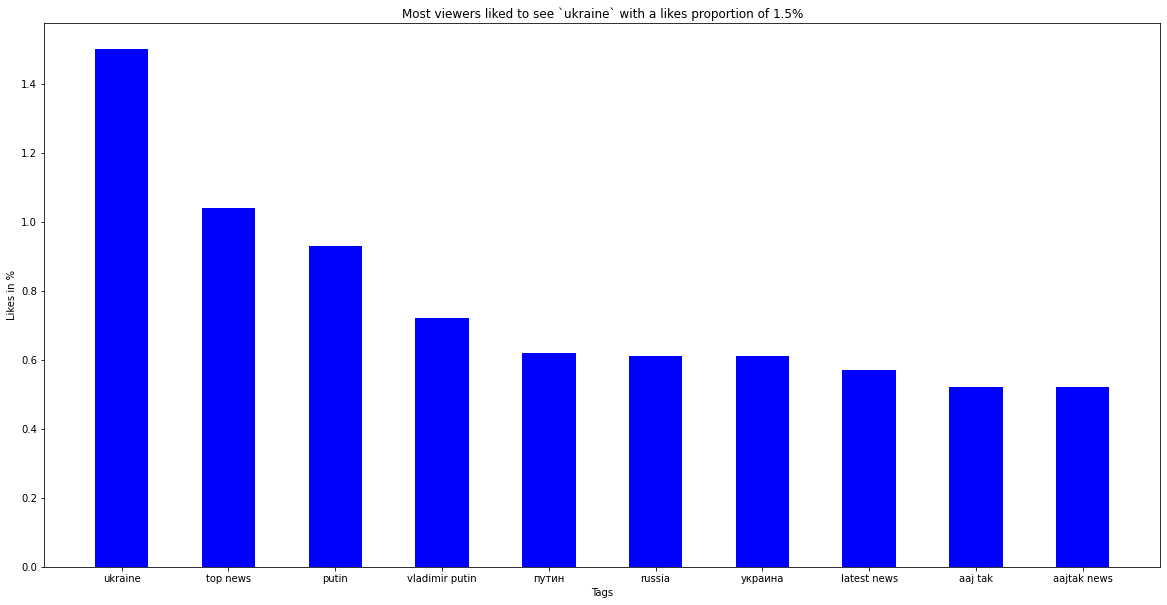

In [38]:
tag_list = []
tag_likes = []
total_likes = 0
max_likes = 0
max_likes_tag = -1
tag_dict_likes = {}
tag_likes_dist = {}
for idx,tags_list in enumerate(yt_data['videoTags']):    
    if tags_list[0] != 'NA':
        for tag in tags_list:
            tag = removeAllSplChars(tag)
            tag = tag.lower()
            if tag in tag_dict_likes:
                tag_dict_likes[tag] = tag_dict_likes[tag]+yt_data['videoLikes'][idx]
            else:
                tag_dict_likes[tag] = yt_data['videoLikes'][idx]
            total_likes = total_likes + yt_data['videoLikes'][idx]
#print(tag_dict_likes)
for tag in tag_dict_likes:
    tag_likes_dist[tag] = round((tag_dict_likes[tag]/total_likes)*100, 2)
    if max_likes < tag_likes_dist[tag]:
        max_likes = tag_likes_dist[tag]
        max_likes_tag = tag
tag_list = list(tag_dict_likes.keys())
tag_likes = list(tag_dict_likes.values())
print(f'Most viewers liked to see `{max_likes_tag}` with a likes proportion of {max_likes}%')
sort_likes = sorted(tag_likes_dist.items(), key=lambda x: x[1], reverse=True)
tag_list,tag_likes = make_a_list(sort_likes)
plot_the_list(x_list=tag_list, y_list=tag_likes, bar_color='blue',x_label='Tags', y_label='Likes in %', graph_title=f'Most viewers liked to see `{max_likes_tag}` with a likes proportion of {max_likes}%')
#print(tag_list,tag_likes)

In [89]:
%matplotlib qt

In [93]:
#Words and their usage

Most popular word is `news` with a likes proportion of 0.2%
How many results you want in graph? 10


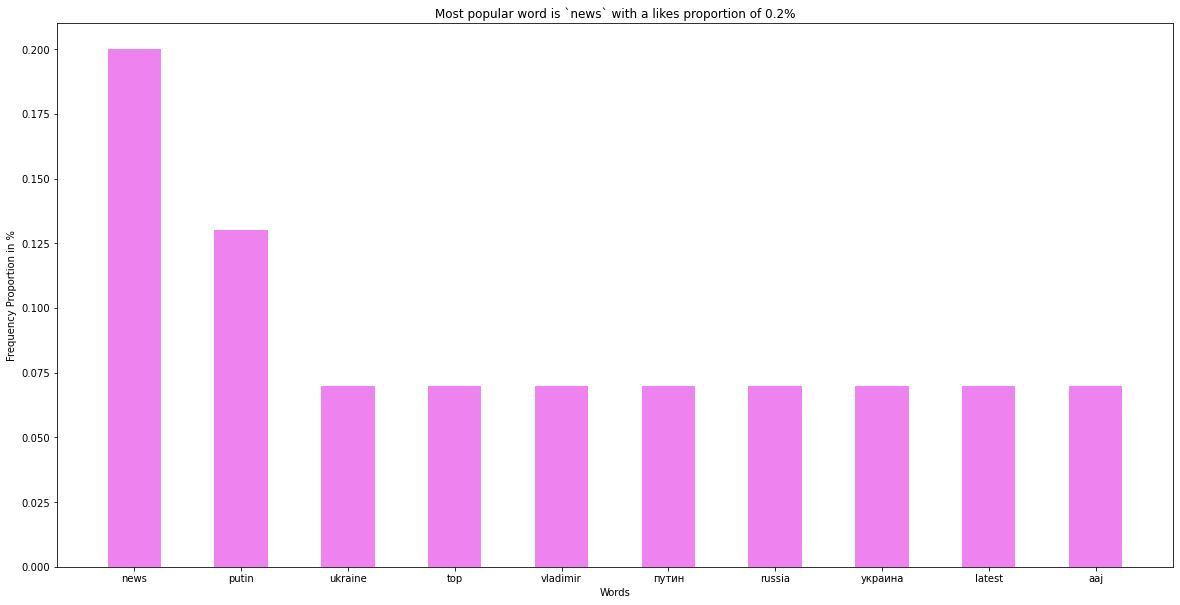

In [41]:
word_list = []
word_freq = []
word_dicti = {}
word_dist_dicti = {}
total_words = 0
max_occurence = 0
max_word = ''
for key in tag_list:
    sec_word_list = removeAllSplChars(key)
    sec_word_list = sec_word_list.lower()
    sec_word_list = sec_word_list.split(' ')
    for word in sec_word_list:
        if word in word_dicti:
            word_dicti[word] = word_dicti[word]+1
        else:
            word_dicti[word] = 1
        total_words=total_words+1
for word in word_dicti:
    word_dist_dicti[word] = round((word_dicti[word]/total_words),2)
    if max_occurence < word_dist_dicti[word]:
        max_occurence = word_dist_dicti[word]
        max_word = word
graph_title = f'Most popular word is `{max_word}` with a likes proportion of {max_occurence}%'
print(graph_title)
sort_words = sorted(word_dist_dicti.items(), key=lambda x: x[1], reverse=True)
word_list,word_freq = make_a_list(sort_words)
plot_the_list(x_list=word_list, y_list=word_freq, bar_color='violet',x_label='Words', y_label='Frequency Proportion in %', graph_title=graph_title)
#print(sort_words)

In [99]:
#Tags which attracted most number of views for the video

The tag which attracted most views is `top news` with a view proportion of 4.52%
How many results you want in graph? 10


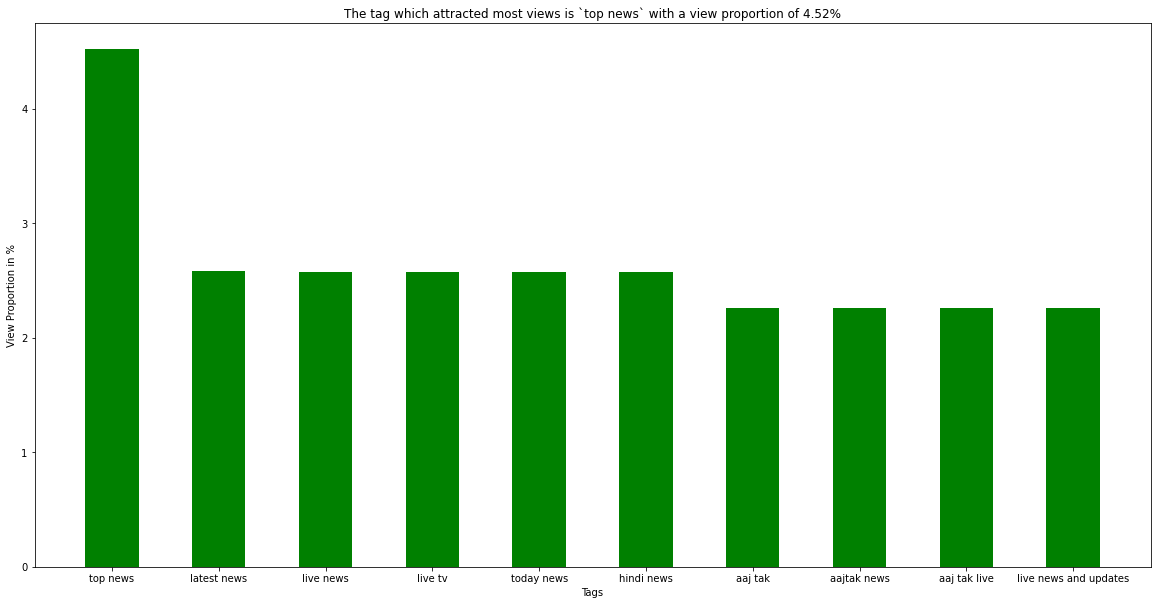

[('top news', 4.52), ('latest news', 2.58), ('live news', 2.57), ('live tv', 2.57), ('today news', 2.57), ('hindi news', 2.57), ('aaj tak', 2.26), ('aajtak news', 2.26), ('aaj tak live', 2.26), ('live news and updates', 2.26), ('live news in hindi', 2.26), ('manish sisodia', 2.26), ('sudhir chaudhary show', 2.26), ('black and white', 2.26), ('black and white aaj tak', 2.26), ('highlights', 2.26), ('sudhir show', 2.26), ('aaj tak hindi news', 2.26), ('aaj tak news video', 2.26), ('aaj tak videos', 2.26), ('aajtak channel news', 2.26), ('news video', 2.26), ('breaking news in hindi', 2.26), ('aajtak', 2.26), ('aaj tak live news', 2.26), ('aaj tak news', 2.26), ('cyrus mistry death', 2.26), ('cyrus mistry', 2.26), ('ukraine', 0.53), ('news live', 0.47), ('live', 0.32), ('republic bharat live', 0.32), ('r bharat live', 0.32), ('republic bharat tv', 0.32), ('republic bharat hindi news', 0.32), ('r bharat news live', 0.32), ('terrorist', 0.32), ('karnal terriost 2022', 0.32), ('terriost', 0.

In [48]:
tag_list = []
tag_views = []
total_views = 0
max_views = 0
max_views_tag = ''
tag_dict_views = {}
tag_views_dist = {}
for idx,tags_list in enumerate(yt_data['videoTags']):    
    if tags_list[0] != 'NA':
        for tag in tags_list:
            tag = removeAllSplChars(tag)
            tag = tag.lower()
            if tag in tag_dict_views:
                tag = removeAllSplChars(tag)
                tag_dict_views[tag] = tag_dict_views[tag]+yt_data['videoViews'][idx]
            else:
                tag_dict_views[tag] = yt_data['videoViews'][idx]
            total_views = total_views+yt_data['videoViews'][idx]
for tag in tag_dict_views:
    tag_views_dist[tag] = round((tag_dict_views[tag]/total_views)*100, 2)
    if max_views < tag_views_dist[tag]:
        max_views = tag_views_dist[tag]
        max_views_tag=tag
tag_list = list(tag_dict_views.keys())
tag_views = list(tag_dict_views.values())
graph_title = f'The tag which attracted most views is `{max_views_tag}` with a view proportion of {max_views}%'
print(graph_title)
sort_views = sorted(tag_views_dist.items(), key=lambda x: x[1], reverse=True)
tag_list,tag_views = make_a_list(sort_views)
plot_the_list(x_list=tag_list, y_list=tag_views, bar_color='green',x_label='Tags', y_label='View Proportion in %', graph_title=graph_title)
print(sort_views)

In [54]:
#Tags which invited maximum engagement from viewers by the way of comments

The topic which attracted most engagement from viewers is `politics` with a view proportion of 0.52%
How many results you want in graph? 10


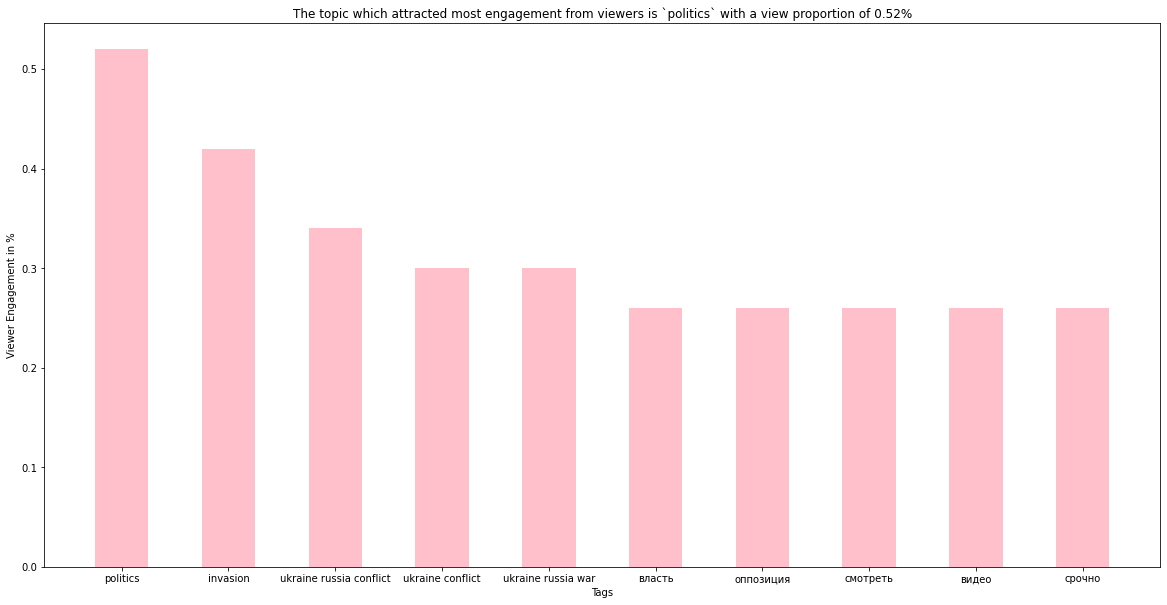

[('politics', 0.52), ('invasion', 0.42), ('ukraine russia conflict', 0.34), ('ukraine conflict', 0.3), ('ukraine russia war', 0.3), ('власть', 0.26), ('оппозиция', 0.26), ('смотреть', 0.26), ('видео', 0.26), ('срочно', 0.26), ('топ', 0.26), ('спецназ', 0.26), ('обращение', 0.26), ('россия украина война', 0.25), ('война в украине', 0.25), ('tucker carlson', 0.24), ('война 2022', 0.23), ('вторжение в украине', 0.23), ('агрессия россии', 0.23), ('украина война', 0.23), ('агрессия против украины', 0.23), ('carlson', 0.23), ('fnc', 0.23), ('fox news', 0.23), ('fox news channel', 0.23), ('fox news media', 0.23), ('fox news network', 0.23), ('fox news voices', 0.23), ('tucker', 0.23), ('tucker carlson monologue', 0.23), ('tucker carlson monologue tonight', 0.23), ('tucker carlson tonight', 0.23), ('tucker monologue', 0.23), ('tucker monologue tonight', 0.23), ('tucker reacts', 0.23), ('tucker tonight', 0.23), ('russia ukraine conflict', 0.23), ('зеленский интервью', 0.23), ('zelenskiy', 0.23)

In [49]:
tag_list = []
tag_comments = []
total_comments = 0
max_comments = 0
max_comments_tag = ''
tag_dict_comments = {}
tag_comments_dist = {}
for idx,tags_list in enumerate(yt_data['videoTags']):    
    if tags_list[0] != 'NA':
        for tag in tags_list:
            if tag in tag_dict_comments:
                tag_dict_comments[tag.lower()] = tag_dict_comments[tag]+yt_data['videoComments'][idx]
            else:
                tag_dict_comments[tag.lower()] = yt_data['videoComments'][idx]
            total_comments = total_comments+yt_data['videoComments'][idx]
for tag in tag_dict_comments:
    tag_comments_dist[tag.lower()] = round((tag_dict_comments[tag.lower()]/total_comments)*100, 2)
    if max_comments < tag_comments_dist[tag.lower()]:
        max_comments = tag_comments_dist[tag.lower()]
        max_comments_tag = tag.lower()
tag_list = list(tag_dict_comments.keys())
tag_comments = list(tag_dict_comments.values())
graph_title = f'The topic which attracted most engagement from viewers is `{max_comments_tag}` with a view proportion of {max_comments}%'
print(graph_title)
sort_comments = sorted(tag_comments_dist.items(), key=lambda x: x[1], reverse=True)
tag_list,tag_comments = make_a_list(sort_comments)
plot_the_list(x_list=tag_list, y_list=tag_comments, bar_color='pink',x_label='Tags', y_label='Viewer Engagement in %', graph_title=graph_title)
print(sort_comments)

In [38]:
#Most views from which language video

The language which attracted most views is `hi` with a view proportion of 72.44%
How many results you want in graph? 10


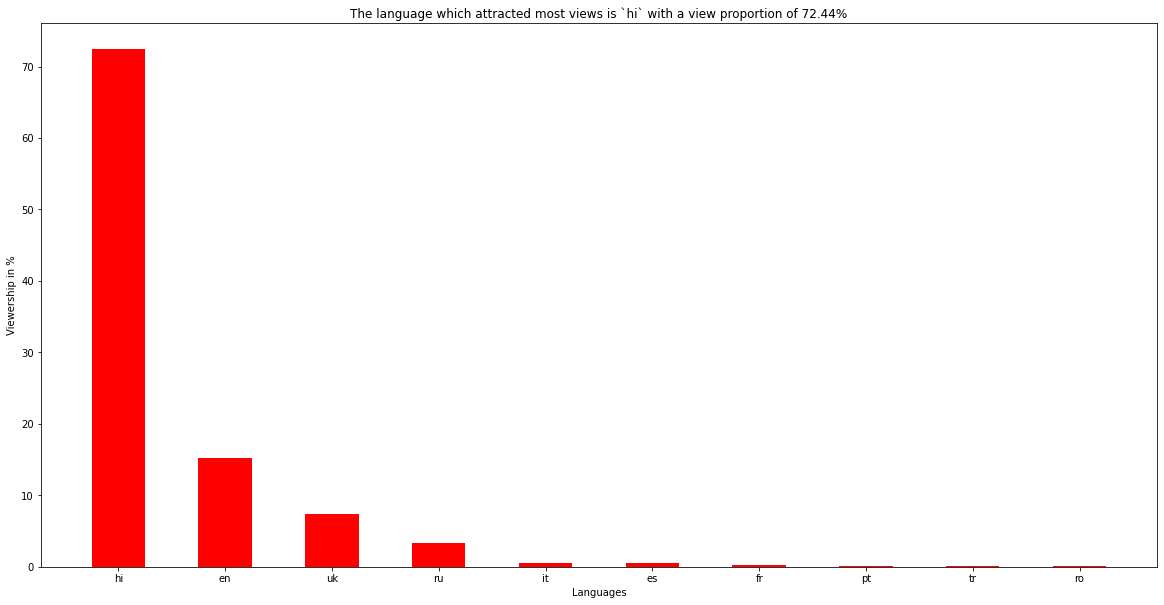

[('hi', 72.44), ('en', 15.17), ('uk', 7.32), ('ru', 3.34), ('it', 0.57), ('es', 0.57), ('fr', 0.32), ('pt', 0.11), ('tr', 0.08), ('ro', 0.07), ('id', 0.0), ('rn', 0.0), ('rw', 0.0)]


In [50]:
lang_list = []
lang_views = []
total_views = 0
max_views = 0
max_views_lang = ''
lang_dict_views = {}
lang_views_dist = {}
for idx,lang in enumerate(yt_data['videoLanguage']):
    if lang != 'NA':
        if lang in lang_dict_views:
            lang_dict_views[lang] = lang_dict_views[lang]+yt_data['videoViews'][idx]
        else:
            lang_dict_views[lang] = yt_data['videoViews'][idx]
        total_views = total_views+yt_data['videoViews'][idx]
for lang in lang_dict_views:
    lang_views_dist[lang] = round((lang_dict_views[lang]/total_views)*100, 2)
    if max_views < lang_views_dist[lang]:
        max_views = lang_views_dist[lang]
        max_views_lang=lang
lang_list = list(lang_dict_views.keys())
lang_views = list(lang_dict_views.values())
graph_title=f'The language which attracted most views is `{max_views_lang}` with a view proportion of {max_views}%'
print(graph_title)
sort_views = sorted(lang_views_dist.items(), key=lambda x: x[1], reverse=True)
lang_list,lang_views = make_a_list(sort_views)
plot_the_list(x_list=lang_list, y_list=lang_views, bar_color='red',x_label='Languages', y_label='Viewership in %', graph_title=graph_title)
print(sort_views)

In [1]:
#Most number of videos are from which country?

The videos originated from GB the most with a proportion of 23.03%.
How many results you want in graph? 10


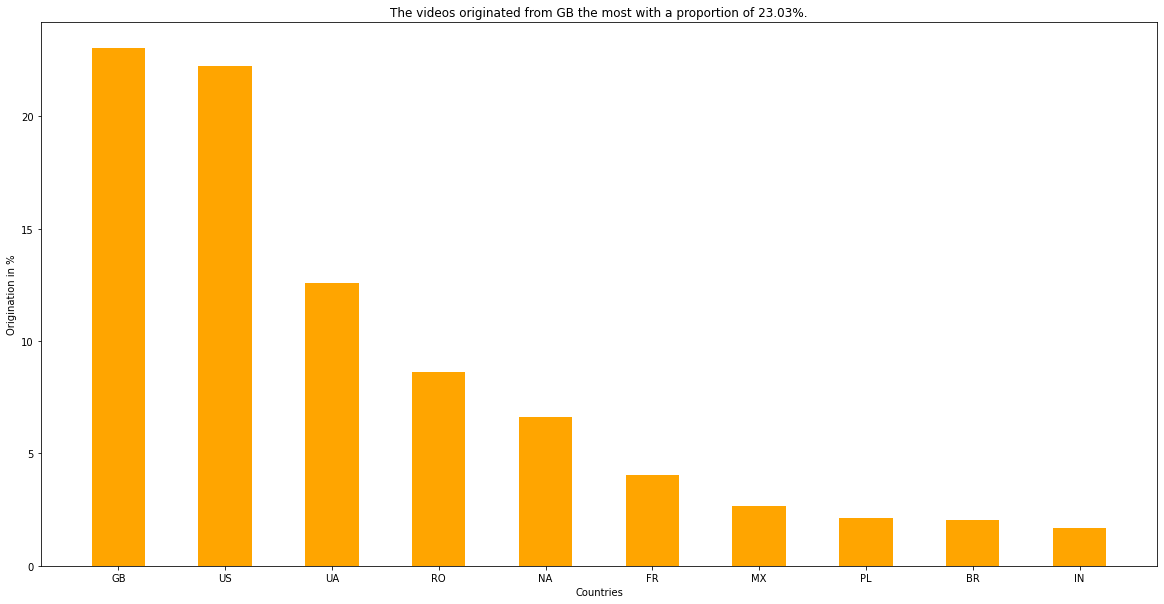

[('GB', 23.03), ('US', 22.22), ('UA', 12.57), ('RO', 8.62), ('NA', 6.61), ('FR', 4.05), ('MX', 2.66), ('PL', 2.12), ('BR', 2.04), ('IN', 1.67), ('RU', 1.31), ('RW', 1.24), ('ES', 1.23), ('PH', 1.18), ('DE', 0.98), ('IT', 0.97), ('TZ', 0.78), ('ID', 0.72), ('ZA', 0.62), ('GR', 0.57), ('AU', 0.51), ('UG', 0.49), ('PK', 0.43), ('RS', 0.34), ('ZW', 0.33), ('BE', 0.27), ('CA', 0.26), ('CO', 0.22), ('MY', 0.21), ('NZ', 0.21), ('TR', 0.18), ('CH', 0.18), ('SE', 0.18), ('NO', 0.17), ('NG', 0.16), ('BA', 0.15), ('IE', 0.14), ('BG', 0.13), ('SI', 0.13), ('AR', 0.13)]


In [51]:
channelid_cnt = {}
for idx in yt_data.index:
    if yt_data['channelId'][idx] in channelid_cnt:
        channelid_cnt[yt_data['channelId'][idx]] = channelid_cnt[yt_data['channelId'][idx]] + yt_data['count'][idx]
    else:
        channelid_cnt[yt_data['channelId'][idx]] = yt_data['count'][idx]
#print(channelid_cnt)
channel_cntry = {}
channel_list = yt_channel_data['channelIds'].tolist()
total_cntry = 0
max_cntry_dist = 0
max_cntry = ''
for channelID in channelid_cnt:
    if channelID in channel_list:
        c_index = channel_list.index(channelID)
        #print(yt_channel_data['channelCountry'][c_index])
        if yt_channel_data['channelCountry'][c_index] in channel_cntry:
            channel_cntry[yt_channel_data['channelCountry'][c_index]] = channel_cntry[yt_channel_data['channelCountry'][c_index]]+channelid_cnt[channelID]
        else:
            channel_cntry[yt_channel_data['channelCountry'][c_index]] = channelid_cnt[channelID]
        total_cntry = total_cntry+channelid_cnt[channelID]
#print(channel_cntry)
for cntry in channel_cntry:
    channel_cntry[cntry] = round((channel_cntry[cntry]/total_cntry)*100, 2)
    if max_cntry_dist < channel_cntry[cntry]:
        max_cntry_dist = channel_cntry[cntry]
        max_cntry=cntry
sort_cntry = sorted(channel_cntry.items(), key=lambda x: x[1], reverse=True)
graph_title = f'The videos originated from {max_cntry} the most with a proportion of {max_cntry_dist}%.'
print(graph_title)
cntry_list,video_dist = make_a_list(sort_cntry)
plot_the_list(x_list=cntry_list, y_list=video_dist, bar_color='orange',x_label='Countries', y_label='Origination in %', graph_title=graph_title)
print(sort_cntry)

In [141]:
print('Dataframe Describe:',yt_data.describe())
print('Dataframe Shape:',yt_data.shape)

Dataframe Describe:              count    videoViews    videoLikes  videoComments
count   1000.00000  1.000000e+03  1.000000e+03    1000.000000
mean     134.77300  2.882822e+06  2.988109e+04    3077.982000
std      494.48471  4.263366e+07  1.003630e+05    7571.261192
min       64.00000  0.000000e+00  0.000000e+00       0.000000
25%       77.00000  5.675000e+01  0.000000e+00       0.000000
50%       97.00000  2.633150e+04  2.150000e+03     113.500000
75%      129.00000  4.530950e+05  2.427975e+04    2463.750000
max    15423.00000  1.303355e+09  1.978047e+06   82660.000000
Dataframe Shape: (1000, 12)


In [142]:
print('Dataframe Describe:',yt_channel_data.describe())
print('Dataframe Shape:',yt_channel_data.shape)

Dataframe Describe:         subscribers  channelViews     videoCount
count  4.240000e+02  4.240000e+02     424.000000
mean   1.123473e+06  5.186157e+08    7054.794811
std    3.879184e+06  1.863011e+09   26402.635796
min    9.000000e+00  4.160000e+02       1.000000
25%    3.257500e+03  4.744722e+05      93.750000
50%    1.135000e+05  1.788037e+07     291.500000
75%    5.897500e+05  1.532674e+08    1796.250000
max    5.330000e+07  2.070403e+10  258570.000000
Dataframe Shape: (424, 8)


In [31]:
#Time given for each tag/topic

In [ ]:
time_type = input('Stats needed in days or hours or minutes seconds?')
div = 1
suff = 's'
if time_type.lower() == 'days':
    div = 86400
    suff = 'day/s'
elif time_type.lower() == 'years':
    div = 31536000
    suff = 'year/s'
elif time_type.lower() == 'hours':
    div = 3600
    suff = 'hour/s'
elif time_type.lower() == 'minutes':
    div = 60
    suff = 'min/s'
else:
    div = 1
tag_list = []
tag_times = []
total_time = 0
max_time = 0
max_time_tag = ''
tag_dict_times = {}
for idx,tags_list in enumerate(yt_data['videoTags']):    
    if tags_list[0] != 'NA':
        for tag in tags_list:
            tag = removeAllSplChars(tag)
            tag = tag.lower()
            if tag in tag_dict_times:
                tag_dict_times[tag] = tag_dict_times[tag]+yt_data['videoTime'][idx]
            else:
                tag_dict_times[tag] = yt_data['videoTime'][idx]
            total_time = total_time+yt_data['videoTime'][idx]
for tag in tag_dict_times:
    tag_dict_times[tag] = round(tag_dict_times[tag]/div,1)
for tag in tag_dict_times:
    if max_time < tag_dict_times[tag]:
        max_time = tag_dict_times[tag]
        max_time_tag=tag
#tag_list = list(tag_dict_views.keys())
#tag_views = list(tag_dict_views.values())
graph_title = f'Time worth `{tag_dict_times[max_time_tag]}` {suff} was given on the topic `{max_time_tag}`'
print(graph_title)
sort_times = sorted(tag_dict_times.items(), key=lambda x: x[1], reverse=True)
tag_list,tag_times = make_a_list(sort_times)
plot_the_list(x_list=tag_list, y_list=tag_times, bar_color='green',x_label='Tags', y_label=f'Time in {suff}', graph_title=graph_title)
print(sort_times)

For this one, we assume that viewers have watched complete videos.
Stats needed in years, days or hours or minutes seconds?years
Topic/Tag `latest news` attracted a watch time of `14.2 year/s`
How many results you want in graph? 10


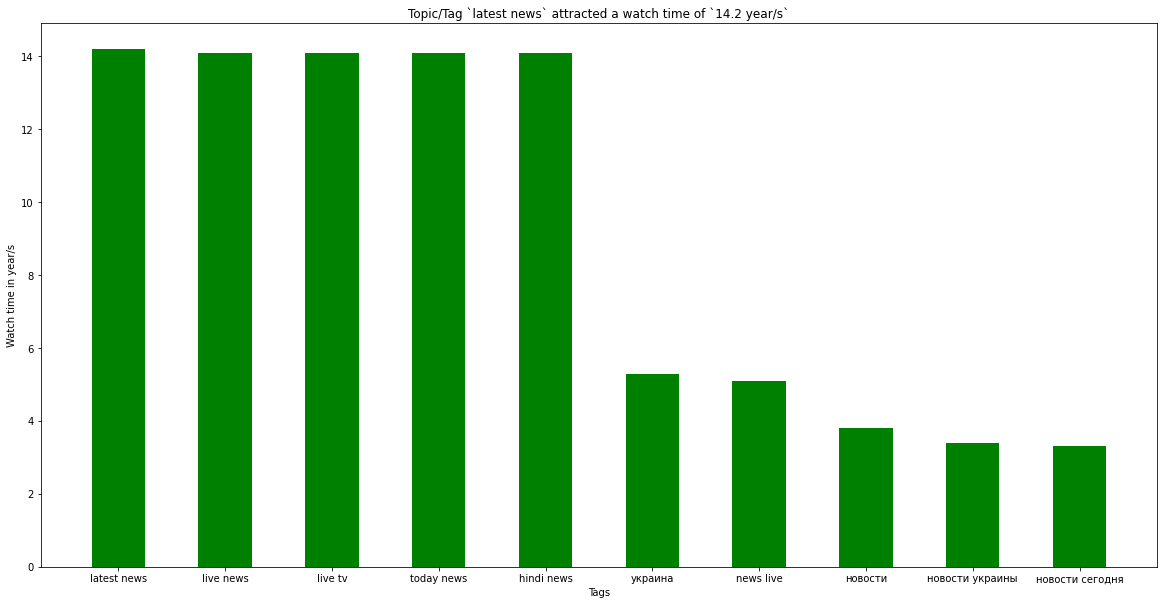

In [64]:
print('For this one, we assume that viewers have watched complete videos.')
time_type = input('Stats needed in years, days or hours or minutes seconds?')
div = 1
suff = 's'
if time_type.lower() == 'days':
    div = 86400
    suff = 'day/s'
elif time_type.lower() == 'years':
    div = 31536000
    suff = 'year/s'
elif time_type.lower() == 'hours':
    div = 3600
    suff = 'hour/s'
elif time_type.lower() == 'minutes':
    div = 60
    suff = 'min/s'
else:
    div = 1
tag_wtime_dict = {}
tag_list = list(tag_dict_views.keys())
for tag in tag_list:
    if tag_dict_views[tag] != 0:
        tag_wtime_dict[tag] = (tag_dict_views[tag]*tag_dict_times[tag])
for tag in tag_wtime_dict:
    tag_wtime_dict[tag] = round(tag_wtime_dict[tag]/div,1)
#print(tag_wtime_dict) 
sort_wtimes = sorted(tag_wtime_dict.items(), key=lambda x: x[1], reverse=True)
# People have watched this topic for:
graph_title = f'Topic/Tag `{sort_wtimes[0][0]}` attracted a watch time of `{sort_wtimes[0][1]} {suff}`'
print(graph_title)
tag_list,tag_wtimes = make_a_list(sort_wtimes)
plot_the_list(x_list=tag_list, y_list=tag_wtimes, bar_color='green',x_label='Tags', y_label=f'Watch time in {suff}', graph_title=graph_title)
#print(sort_wtimes)